# Task 2: Generate Stationary Multivariate Hawkes Data

This notebook generates 500 sequences of stationary multivariate Hawkes data using Sparklen and converts them to EasyTPP format.

## 1. Package Installation

In [1]:
!apt-get update
!apt-get install swig -y

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cli.github.com/packages stable InRelease [3,917 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [6,411 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,966 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,598 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [69.2 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports/universe amd64 Packages [37.2 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports/main am

In [2]:
!pip install sparklen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 14.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for sparklen: filename=sparklen-1.0.0-cp312-cp312-linux_x86_64.whl size=937910 sha256=493f951bff3a8dfc4fc8abef8ff36bd84b90a8404d076e05af5a714084a7cb7a
  Stored in directory: /root/.cache/pip/wheels/bc/a6/69/de616a46fb6e3de19118ba8090015b77c74ccf749d01a97753
Successfully built sparklen


## 2. Mount Google Drive

In [3]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Base directory (your Drive location)
BASE_DIR = '/content/drive/MyDrive/Colab Notebooks/MilestoneFall2025'
DATASET_DIR = os.path.join(BASE_DIR, 'Datasets')
CHECKPOINT_DIR = os.path.join(BASE_DIR, 'checkpoints')
RESULTS_DIR = os.path.join(BASE_DIR, 'results')

# Create results directory if it doesn't exist
os.makedirs(RESULTS_DIR, exist_ok=True)

print(f"✓ Base Directory: {BASE_DIR}")
print(f"✓ Dataset Directory: {DATASET_DIR}")
print(f"✓ Checkpoint Directory: {CHECKPOINT_DIR}")
print(f"✓ Results Directory: {RESULTS_DIR}")

Mounted at /content/drive
✓ Base Directory: /content/drive/MyDrive/Colab Notebooks/MilestoneFall2025
✓ Dataset Directory: /content/drive/MyDrive/Colab Notebooks/MilestoneFall2025/Datasets
✓ Checkpoint Directory: /content/drive/MyDrive/Colab Notebooks/MilestoneFall2025/checkpoints
✓ Results Directory: /content/drive/MyDrive/Colab Notebooks/MilestoneFall2025/results


## 3. Generate Stationary Hawkes Data with Sparklen

Parameters:
- Time horizon: T = 20.0 (changed from 5.0)
- Number of sequences: 500 (changed from 3)
- Dimension: 2 (bivariate Hawkes process)

In [4]:
import numpy as np
from sparklen.hawkes.simulation import SimuHawkesExp
import matplotlib.pyplot as plt

# Parameters for stationary Hawkes process
d = 2  # Dimension
T = 20.0  # Time horizon (changed from 5.0)
n = 500  # Number of sequences (changed from 3)
beta = 3.0  # Decay rate

# Define baseline intensities (mu)
mu = np.array([0.6, 0.5])

# Define adjacency matrix (alpha) - excitation structure
alpha = np.array([[0.2, 0.1],
                  [0.0, 0.3]])

print("Hawkes Process Parameters:")
print(f"  Dimension: {d}")
print(f"  Time horizon: {T}")
print(f"  Number of sequences: {n}")
print(f"  Baseline intensities (μ): {mu}")
print(f"  Adjacency matrix (α):\n{alpha}")
print(f"  Decay rate (β): {beta}")

# Create and run Hawkes simulator
print(f"\nSimulating {n} sequences...")

hawkes = SimuHawkesExp(
    mu=mu,
    alpha=alpha,
    beta=beta,
    end_time=T,
    n_samples=n,
    random_state=42
)

hawkes.simulate()

# Get the simulated data
data = hawkes.timestamps

print(f"✓ Simulation complete!")
print(f"  Generated {len(data)} sequences")
print(f"  Each sequence has {d} event types (dimensions)")

Hawkes Process Parameters:
  Dimension: 2
  Time horizon: 20.0
  Number of sequences: 500
  Baseline intensities (μ): [0.6 0.5]
  Adjacency matrix (α):
[[0.2 0.1]
 [0.  0.3]]
  Decay rate (β): 3.0

Simulating 500 sequences...
✓ Simulation complete!
  Generated 500 sequences
  Each sequence has 2 event types (dimensions)


### Visualize Sample Sequences

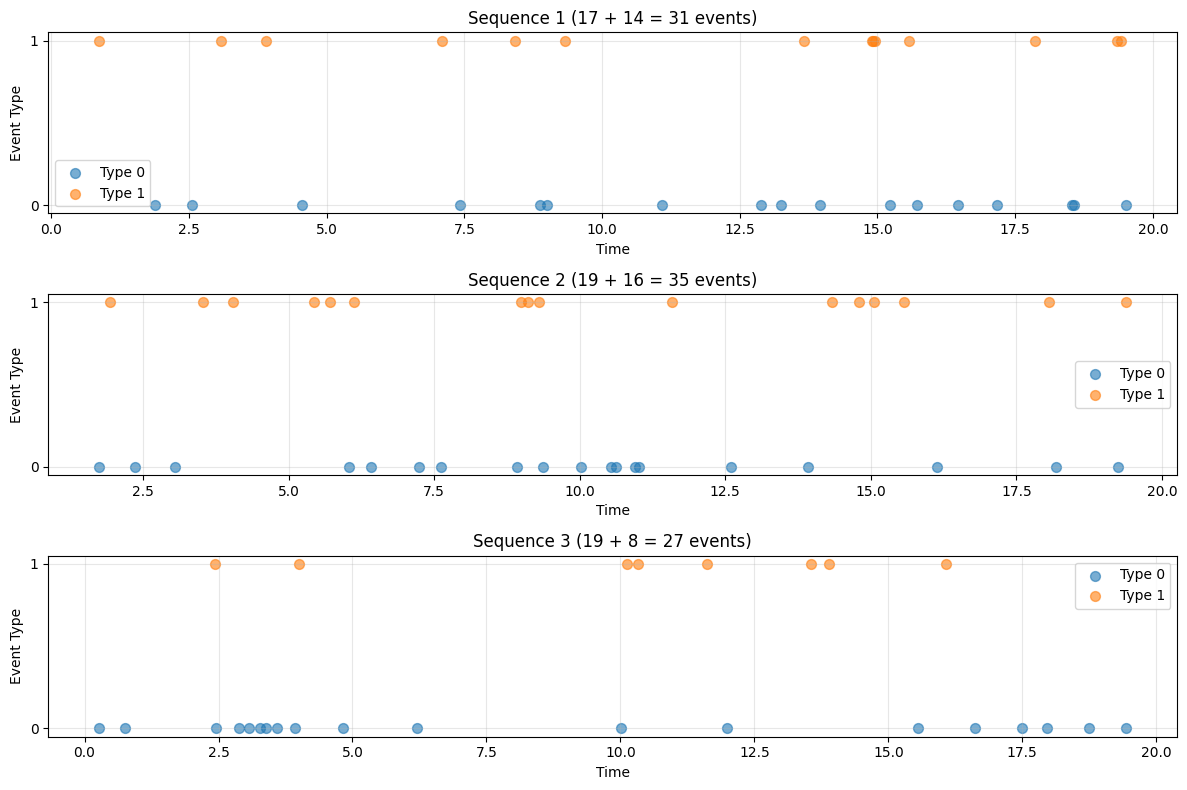


Statistics for first 3 sequences:
  Sequence 1: 31 total events
    Type 0: 17 events
    Type 1: 14 events
  Sequence 2: 35 total events
    Type 0: 19 events
    Type 1: 16 events
  Sequence 3: 27 total events
    Type 0: 19 events
    Type 1: 8 events


In [5]:
# Visualize first 3 sequences
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

for i, ax in enumerate(axes):
    sequence = data[i]

    # Plot each dimension
    for dim in range(d):
        timestamps = sequence[dim]
        ax.scatter(timestamps, [dim] * len(timestamps), label=f'Type {dim}', alpha=0.6, s=50)

    ax.set_xlabel('Time')
    ax.set_ylabel('Event Type')
    ax.set_title(f'Sequence {i+1} ({len(sequence[0])} + {len(sequence[1])} = {len(sequence[0]) + len(sequence[1])} events)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_yticks([0, 1])

plt.tight_layout()
plt.show()

# Print statistics
print("\nStatistics for first 3 sequences:")
for i in range(3):
    total_events = sum(len(data[i][dim]) for dim in range(d))
    print(f"  Sequence {i+1}: {total_events} total events")
    for dim in range(d):
        print(f"    Type {dim}: {len(data[i][dim])} events")

### Inspect Raw Sparklen Data Format

In [6]:
print("Raw Sparklen data format (first 2 sequences):")
print(data[:2])

print("\nStructure:")
print(f"  data is a list of length: {len(data)}")
print(f"  Each element is a list of {len(data[0])} arrays (one per dimension)")
print(f"  data[0][0] (Type 0 timestamps): {data[0][0]}")
print(f"  data[0][1] (Type 1 timestamps): {data[0][1]}")

Raw Sparklen data format (first 2 sequences):
[[array([ 1.88354696,  2.56227265,  4.54477444,  7.41596048,  8.86828398,
        9.00771876, 11.09169574, 12.8773024 , 13.25131562, 13.94736058,
       15.22279404, 15.72128611, 16.45523227, 17.1719584 , 18.53529978,
       18.55964256, 19.51244703]), array([ 0.87607532,  3.08578984,  3.89277416,  7.09051936,  8.42243812,
        9.33442007, 13.66097906, 14.89524312, 14.91182669, 14.95105413,
       15.56766994, 17.86242243, 19.35019465, 19.41396049])], [array([ 1.75299839,  2.36011804,  3.04624205,  6.03024178,  6.41571103,
        7.23625221,  7.62042452,  8.92312551,  9.37119067, 10.0208955 ,
       10.53480225, 10.63079186, 10.94775401, 11.02657573, 12.60565186,
       13.9264075 , 16.13381837, 18.17161381, 19.23795329]), array([ 1.92781924,  3.53545566,  4.0472673 ,  5.44483124,  5.7045303 ,
        6.11913248,  8.98723004,  9.1155258 ,  9.30917897, 11.58439138,
       14.33780378, 14.80372326, 15.05874488, 15.57501808, 18.05204793,
 

## 4. Convert to EasyTPP Format and Save

Convert the sparklen data to EasyTPP format and split into:
- train.pkl: 300 sequences
- dev.pkl: 100 sequences
- test.pkl: 100 sequences

In [7]:
import pickle
from typing import List, Dict, Any

def convert_sparklen_to_easytpp(sparklen_data: List[List[np.ndarray]],
                                 dim_process: int = 2) -> List[List[Dict[str, Any]]]:
    """
    Convert sparklen multivariate Hawkes data to EasyTPP format.

    Args:
        sparklen_data: List of sequences, where each sequence is a list of arrays.
                      Each array contains timestamps for one event type.
        dim_process: Number of event types (dimensions).

    Returns:
        List of sequences in EasyTPP format. Each sequence is a list of event dicts.
    """
    easytpp_sequences = []

    for seq_idx, sequence in enumerate(sparklen_data):
        # Collect all events with their types
        all_events = []

        for event_type in range(dim_process):
            timestamps = sequence[event_type]
            for timestamp in timestamps:
                all_events.append({
                    'time': float(timestamp),
                    'type': event_type
                })

        # Sort events by time
        all_events.sort(key=lambda x: x['time'])

        # Convert to EasyTPP format
        easytpp_sequence = []
        prev_time = 0.0

        for idx, event in enumerate(all_events, start=1):
            time_since_start = event['time']
            time_since_last_event = time_since_start - prev_time

            easytpp_event = {
                'idx_event': idx,
                'type_event': event['type'],
                'time_since_start': time_since_start,
                'time_since_last_event': time_since_last_event
            }

            easytpp_sequence.append(easytpp_event)
            prev_time = time_since_start

        easytpp_sequences.append(easytpp_sequence)

    return easytpp_sequences


# Convert and save the data
print(f"Converting {len(data)} sparklen sequences to EasyTPP format...")

# Convert all sequences
all_easytpp_sequences = convert_sparklen_to_easytpp(data, dim_process=2)

print(f"✓ Conversion complete. Total sequences: {len(all_easytpp_sequences)}")

# Split the data (300 train, 100 dev, 100 test)
train_sequences = all_easytpp_sequences[:300]
dev_sequences = all_easytpp_sequences[300:400]
test_sequences = all_easytpp_sequences[400:500]

print(f"\nSplitting data:")
print(f"  Train: {len(train_sequences)} sequences")
print(f"  Dev: {len(dev_sequences)} sequences")
print(f"  Test: {len(test_sequences)} sequences")

# Create output directory
output_dir = os.path.join(DATASET_DIR, 'stationary_hawkes')
os.makedirs(output_dir, exist_ok=True)

# Save train.pkl
train_data = {
    'dim_process': 2,
    'train': train_sequences
}
train_path = os.path.join(output_dir, 'train.pkl')
with open(train_path, 'wb') as f:
    pickle.dump(train_data, f)
print(f"\n✓ Saved: {train_path}")

# Save dev.pkl
dev_data = {
    'dim_process': 2,
    'dev': dev_sequences
}
dev_path = os.path.join(output_dir, 'dev.pkl')
with open(dev_path, 'wb') as f:
    pickle.dump(dev_data, f)
print(f"✓ Saved: {dev_path}")

# Save test.pkl
test_data = {
    'dim_process': 2,
    'test': test_sequences
}
test_path = os.path.join(output_dir, 'test.pkl')
with open(test_path, 'wb') as f:
    pickle.dump(test_data, f)
print(f"✓ Saved: {test_path}")

# Print sample from first training sequence for verification
print("\n" + "="*70)
print("SAMPLE FROM FIRST TRAINING SEQUENCE (for verification)")
print("="*70)
print(f"First 10 events: {train_sequences[0][:10]}")
print(f"\nTotal events in first sequence: {len(train_sequences[0])}")
print(f"Event types present: {set([e['type_event'] for e in train_sequences[0]])}")

Converting 500 sparklen sequences to EasyTPP format...
✓ Conversion complete. Total sequences: 500

Splitting data:
  Train: 300 sequences
  Dev: 100 sequences
  Test: 100 sequences

✓ Saved: /content/drive/MyDrive/Colab Notebooks/MilestoneFall2025/Datasets/stationary_hawkes/train.pkl
✓ Saved: /content/drive/MyDrive/Colab Notebooks/MilestoneFall2025/Datasets/stationary_hawkes/dev.pkl
✓ Saved: /content/drive/MyDrive/Colab Notebooks/MilestoneFall2025/Datasets/stationary_hawkes/test.pkl

SAMPLE FROM FIRST TRAINING SEQUENCE (for verification)
First 10 events: [{'idx_event': 1, 'type_event': 1, 'time_since_start': 0.8760753157445755, 'time_since_last_event': 0.8760753157445755}, {'idx_event': 2, 'type_event': 0, 'time_since_start': 1.8835469577529906, 'time_since_last_event': 1.007471642008415}, {'idx_event': 3, 'type_event': 0, 'time_since_start': 2.5622726535109175, 'time_since_last_event': 0.6787256957579269}, {'idx_event': 4, 'type_event': 1, 'time_since_start': 3.0857898413509566, 'tim

## 5. Verify Conversion

Load the saved data and verify it matches EasyTPP format.

In [8]:
# Load the converted data to verify
print("Loading converted Hawkes data for verification...")
train_path = os.path.join(DATASET_DIR, 'stationary_hawkes', 'train.pkl')

with open(train_path, 'rb') as f:
    hawkes_data = pickle.load(f)

print("\n" + "="*70)
print("HAWKES DATASET STRUCTURE (after conversion)")
print("="*70)

print(f"\nType of loaded data: {type(hawkes_data)}")
print(f"Top-level keys: {list(hawkes_data.keys())}")

print(f"\n--- Key: 'dim_process' ---")
print(f"Value: {hawkes_data['dim_process']}")

print(f"\n--- Key: 'train' ---")
print(f"Type: {type(hawkes_data['train'])}")
print(f"Length: {len(hawkes_data['train'])} sequences")
print(f"First element type: {type(hawkes_data['train'][0])}")
print(f"First sequence (first 10 events):")
for event in hawkes_data['train'][0][:10]:
    print(f"  {event}")

print(f"\n--- Statistics ---")
first_seq = hawkes_data['train'][0]
print(f"Total events in first sequence: {len(first_seq)}")
print(f"Event types present: {set([e['type_event'] for e in first_seq])}")
print(f"Time range: {first_seq[0]['time_since_start']:.4f} to {first_seq[-1]['time_since_start']:.4f}")

# Check that time_since_last_event is calculated correctly
print(f"\n--- Validation checks ---")
all_valid = True
for i in range(1, min(10, len(first_seq))):
    expected_delta = first_seq[i]['time_since_start'] - first_seq[i-1]['time_since_start']
    actual_delta = first_seq[i]['time_since_last_event']
    if abs(expected_delta - actual_delta) > 1e-10:
        print(f"❌ Event {i}: time_since_last_event mismatch!")
        all_valid = False

if all_valid:
    print("✓ All time_since_last_event values are correct!")

# Check that events are chronologically sorted
times = [e['time_since_start'] for e in first_seq]
if times == sorted(times):
    print("✓ Events are chronologically sorted!")
else:
    print("❌ Events are NOT chronologically sorted!")

# Check idx_event numbering
indices = [e['idx_event'] for e in first_seq]
if indices == list(range(1, len(first_seq) + 1)):
    print("✓ Event indices are correctly numbered 1 to N!")
else:
    print("❌ Event indices are NOT correctly numbered!")

print("\n" + "="*70)
print("COMPARISON WITH TAXI DATASET FORMAT")
print("="*70)

# Load taxi for comparison
taxi_path = os.path.join(DATASET_DIR, 'taxi', 'train.pkl')

try:
    with open(taxi_path, 'rb') as f:
        taxi_data = pickle.load(f)

    print(f"\nTaxi dataset keys: {list(taxi_data.keys())}")
    print(f"Hawkes dataset keys: {list(hawkes_data.keys())}")
    print(f"\nTaxi dim_process: {taxi_data['dim_process']}")
    print(f"Hawkes dim_process: {hawkes_data['dim_process']}")
    print(f"\nTaxi number of sequences: {len(taxi_data['train'])}")
    print(f"Hawkes number of sequences: {len(hawkes_data['train'])}")

    print(f"\n--- Event structure comparison ---")
    print(f"Taxi event keys: {list(taxi_data['train'][0][0].keys())}")
    print(f"Hawkes event keys: {list(hawkes_data['train'][0][0].keys())}")

    if set(taxi_data['train'][0][0].keys()) == set(hawkes_data['train'][0][0].keys()):
        print("✓ Event structures match perfectly!")
    else:
        print("❌ Event structures do not match!")

except FileNotFoundError:
    print(f"\nNote: Taxi dataset not found at {taxi_path}")
    print("Skipping comparison, but Hawkes data structure looks correct!")

print("\n" + "="*70)
print("CONVERSION SUCCESSFUL! Data is ready for EasyTPP.")
print("="*70)

Loading converted Hawkes data for verification...

HAWKES DATASET STRUCTURE (after conversion)

Type of loaded data: <class 'dict'>
Top-level keys: ['dim_process', 'train']

--- Key: 'dim_process' ---
Value: 2

--- Key: 'train' ---
Type: <class 'list'>
Length: 300 sequences
First element type: <class 'list'>
First sequence (first 10 events):
  {'idx_event': 1, 'type_event': 1, 'time_since_start': 0.8760753157445755, 'time_since_last_event': 0.8760753157445755}
  {'idx_event': 2, 'type_event': 0, 'time_since_start': 1.8835469577529906, 'time_since_last_event': 1.007471642008415}
  {'idx_event': 3, 'type_event': 0, 'time_since_start': 2.5622726535109175, 'time_since_last_event': 0.6787256957579269}
  {'idx_event': 4, 'type_event': 1, 'time_since_start': 3.0857898413509566, 'time_since_last_event': 0.5235171878400391}
  {'idx_event': 5, 'type_event': 1, 'time_since_start': 3.8927741570393515, 'time_since_last_event': 0.8069843156883949}
  {'idx_event': 6, 'type_event': 0, 'time_since_star

## Summary

**Task 2 Complete!** ✓
1. Generated 500 stationary multivariate Hawkes sequences with T=20
2. Converted them to EasyTPP format
3. Split into train (300), dev (100), test (100)
4. Saved to:
   - `Datasets/stationary_hawkes/train.pkl`
   - `Datasets/stationary_hawkes/dev.pkl`
   - `Datasets/stationary_hawkes/test.pkl`